# Abalone Project

In this Project we determine the age of Abalone by simply counting the number of rings.

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

Importing the required Libraries for Data Analysis

In [302]:
df=pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We load the data in Dataframe and view the first five rows.

In [303]:
df.shape

(4177, 9)

it shows the Data has 4177 rows and 9 Columns 

In [304]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

This show the numerical count of missing values in the colmns. It is zero in all Columns

<AxesSubplot:>

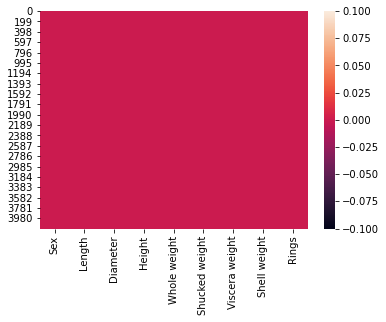

In [305]:
sns.heatmap(df.isnull())

Heat Map of Missing Values generally shown as colour White. There is no missing values shown.

In [306]:
df.value_counts().sum()

4177

<AxesSubplot:xlabel='Rings', ylabel='count'>

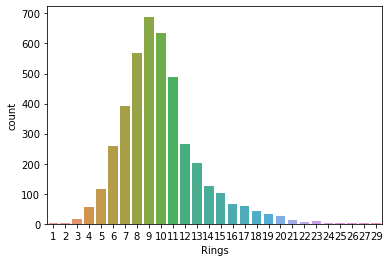

In [307]:
sns.countplot(x='Rings',data=df)

This graph shows the numerical value count of column 'Rings'. It shows that maximum number of vakues lies between 6 and 13 and 9 being the highest count of 680

In [308]:
(df == 0).astype(bool).sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

This shows that Column 'Height' has two zero value. Since height cannot be zero. we will use mean height to replace the data. 

In [309]:
df1=df.replace(0,df.mean())
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Here we replace the zero value in Column 'Height' with the mean value.

In [310]:
(df1==0).astype(bool).sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Checking for number of zero values after replacing with mean value. There is no zero value.

# Dropping Column 'Sex'

The reason for droping the column is that formation of ring is independent of sex it does not contribute to the Outcome.

In [311]:
df1=df1.drop(['Sex'],axis=1)

Here we drop Column 'Sex' because it does not contribute to the outcome of 'Rings'

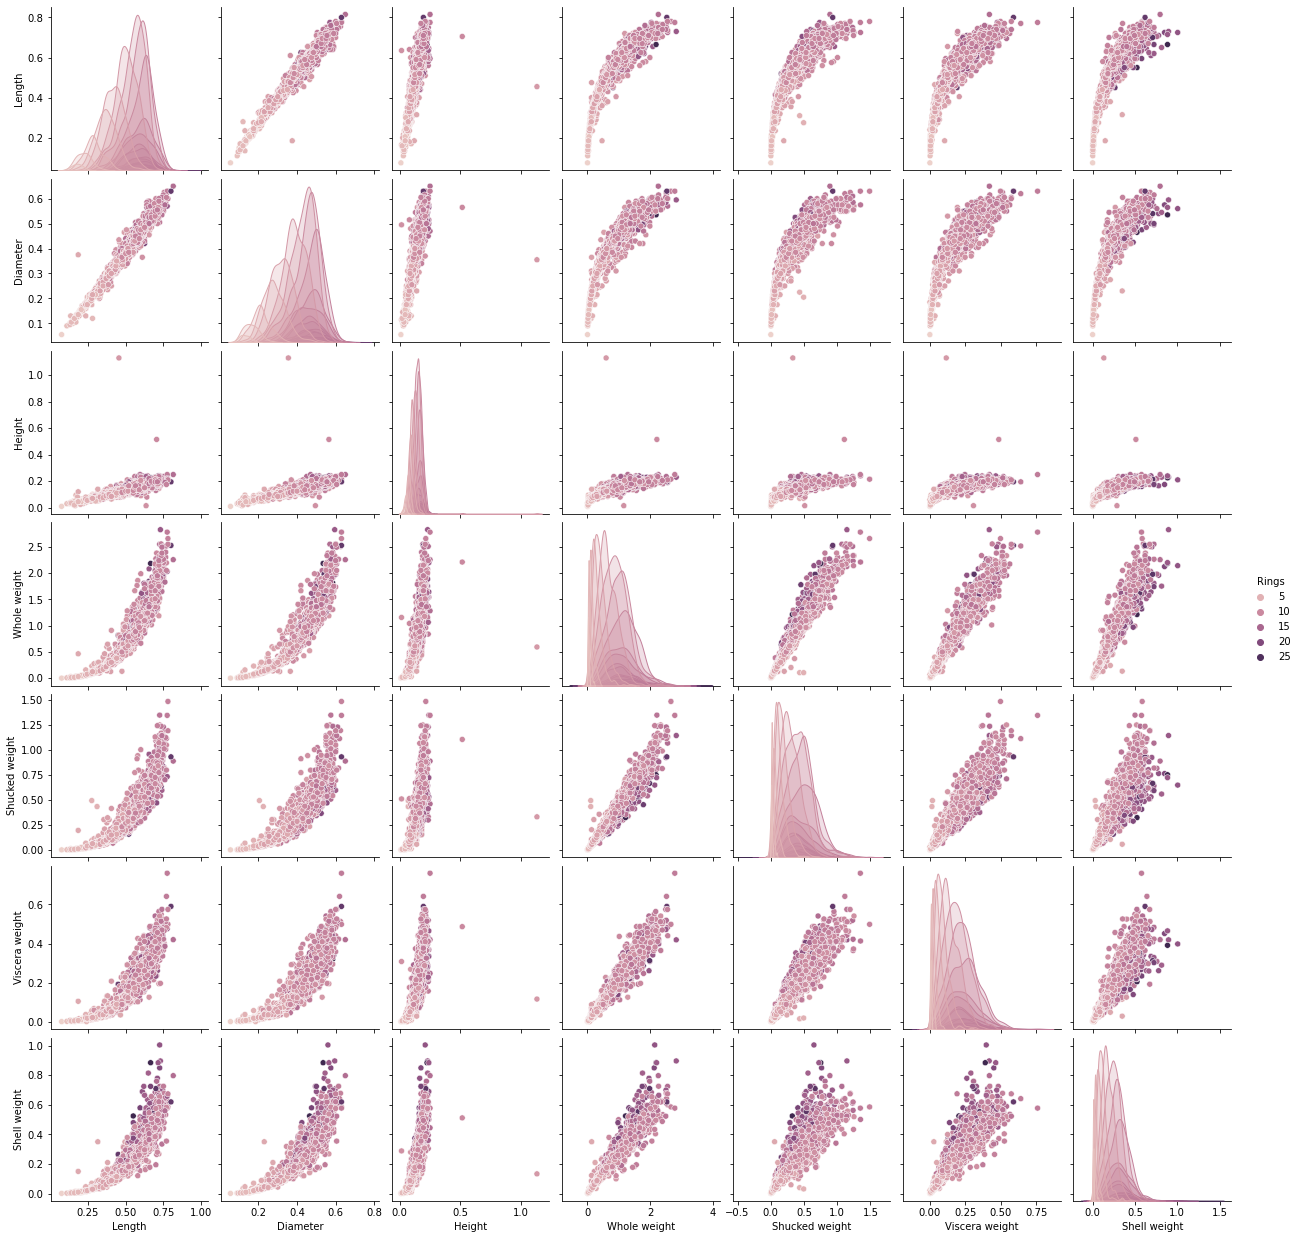

In [312]:
sns.pairplot(df1,hue='Rings')

Pair Plots between Columns.

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557502
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


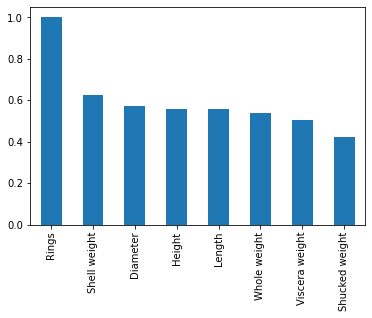

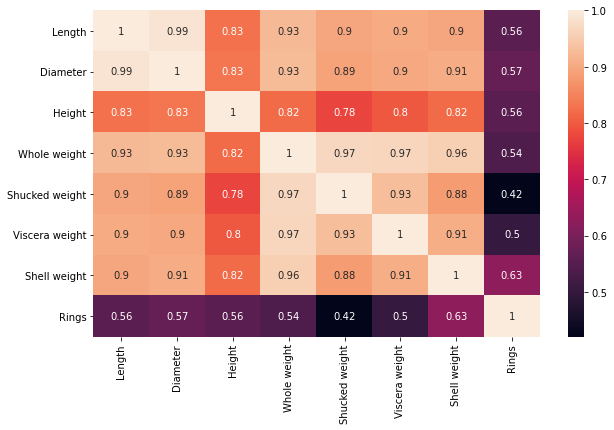

In [313]:
cor=df1.corr()['Rings'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In this heat map we can see that Correlation Between Rings and Shell weight is high, so numbers of rings is highly attributed by Shell weight.
The bar plot showing correlation value of columns.

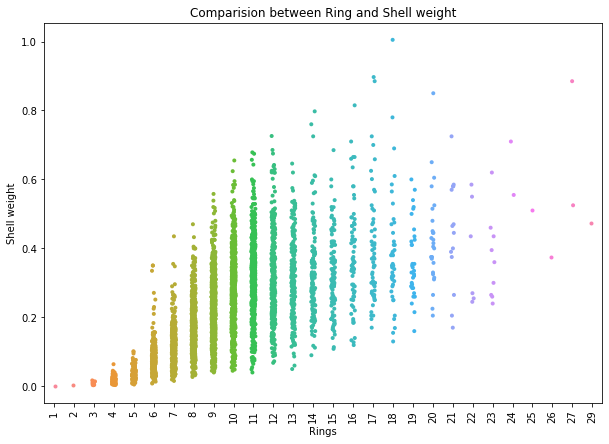

In [314]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
plt.title('Comparision between Ring and Shell weight')
sns.stripplot(x='Rings',y='Shell weight',data=df1,size=4)
plt.show()

Comparision between Ring and Shell weight, Here we can see that shell weight increases with number of rings. 

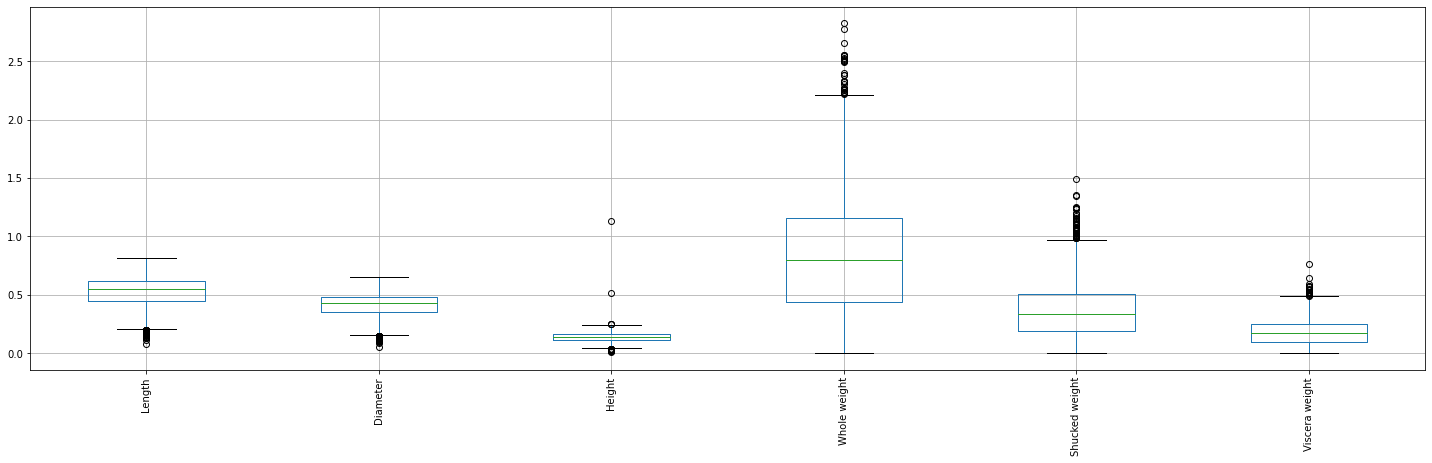

In [315]:
df1.iloc[:,0:6].boxplot(figsize=(25,8))
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show()

This Box Plot shows there are a lot of outliers in the data.

# Removing Outliers

In [316]:

from scipy.stats import zscore
z=np.abs(zscore(df1))
df1.apply(zscore)
threshold=3
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)
df2.head()

(4177, 8)
(4029, 8)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here we remove the outliers and check the number of rows and columns for data lost.

In [317]:
4029/4177*100

96.4567871678238

Here we see that 96.45% data has been retained

In [318]:
x=df2.drop(['Rings'],axis=1)
print(x.shape)
y1=df2['Rings'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)

(4029, 7)
(4029, 1)


Here we assign x and y to be use in various Model for Prediction.

# Scaling of Datas

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [320]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df2)
x=pd.DataFrame(x,columns=df2.columns)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.568607,-0.419558,-1.166517,-0.632523,-0.603176,-0.722418,-0.630691,1.837267
1,-1.474398,-1.462177,-1.302149,-1.264947,-1.208817,-1.230416,-1.256088,-0.955677
2,0.078386,0.153883,-0.081460,-0.275209,-0.448131,-0.330533,-0.161643,-0.257441
3,-0.698006,-0.419558,-0.352724,-0.628139,-0.646782,-0.596628,-0.591604,0.091677
4,-1.646929,-1.566439,-1.573413,-1.309885,-1.257269,-1.317501,-1.373350,-0.955677


Here we use scaling of datas so that datas can be evaluated.

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3142, 8)
(887, 8)
(3142, 1)
(887, 1)


Using Train Test Split for Prediction.

# 1. Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression

In [323]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 78.12852311161218 Percentage
Confusion Matrix 
 [[  0   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   4   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   8  17   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1  36  15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  74   9   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   5 111   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 159   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  29  91   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  20   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  10  28   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   4  13   0   0   0   0]
 [  0   0 

We use Logistic Regression to predict the outcome. Here the accuracy is 78% and Error is 194

# 2. Decision Tree Classifier

In [324]:
from sklearn.tree import DecisionTreeClassifier

In [325]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 100.0 Percentage
Confusion Matrix 
 [[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  83   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 160   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  52   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0 

Using Decision Tree Classifier we find the accuracy to be 100% and No Error.

# 3. Support Vector Classifier

In [326]:
from sklearn.svm import LinearSVC

In [327]:
svc=SVC(kernel = 'linear', C = 1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.9943630214205186
Confusion Matrix [[  0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  83   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 160   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  52   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  22   0   0   0   0]
 [  0   0   0   0   0   0 

Using Support Vector Classifier we find the accuracy to be 99% and Error is 5

# 4. K-Neighbors Classifier

In [329]:
from sklearn.neighbors import KNeighborsClassifier

In [330]:
knn=KNeighborsClassifier(n_neighbors=500)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.3032694475760992
Confusion Matrix 
 [[ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 27  8  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 37 30  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 20 57 38  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 45 75 28  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 19 33 57 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 13 18 57 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3  7 31  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 23  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  6 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  1  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  3  0  0  0  0  0  0]]
Classification Report       

Using K-Neighbors Classifier we find the accuracy to be 100% and Error is 618. Due to low accuracy and high Error this Model is discarded.

# 5. Random Forest Classifier

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.9357384441939121
Confusion Matrix 
 [[  1   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  50   1   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  82   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2 119   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 160   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2 117   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1  50   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   1   3  20   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   2   3  15   1   0   0   0]
 [  0   0   0   0   0   

Using Random Forest Classifier we find the accuracy to be 95% and Error is 41

# Cross Validation Score

In [334]:
model=[lg,dtc,svc,knn,rfc]
for i in model:
    score=cross_val_score(i,x,y,cv=5)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n')

Cross Val Score of LogisticRegression() = [0.75062035 0.74317618 0.74937965 0.74069479 0.78509317]
Mean Score of LogisticRegression() = 0.7537928270887597
Difference of Accuracy in LogisticRegression() and Cross Val Score of LogisticRegression() is= 0.027492404027362083


Cross Val Score of DecisionTreeClassifier() = [1. 1. 1. 1. 1.]
Mean Score of DecisionTreeClassifier() = 1.0
Difference of Accuracy in DecisionTreeClassifier() and Cross Val Score of DecisionTreeClassifier() is= 0.0


Cross Val Score of SVC(C=1, kernel='linear') = [0.99751861 0.99751861 0.99751861 0.99751861 0.99751553]
Mean Score of SVC(C=1, kernel='linear') = 0.997517993927531
Difference of Accuracy in SVC(C=1, kernel='linear') and Cross Val Score of SVC(C=1, kernel='linear') is= -0.0031549725070124657


Cross Val Score of KNeighborsClassifier(n_neighbors=500) = [0.25558313 0.32009926 0.32009926 0.30521092 0.31801242]
Mean Score of KNeighborsClassifier(n_neighbors=500) = 0.3038009956383029
Difference of Accuracy in K

# Conclusion

Here we can see that Decision Tree Classifier has Accuracy of 100% and the Difference is zero . Hence we will use Decision Tree Classifier Model to Predict the Outcome of Age as Number of Rings.

# Saving the Model

In [335]:
import joblib

In [336]:
joblib.dump(dtc,'bankdtc.org')

['bankdtc.org']

In [337]:
bankfile=joblib.load('bankdtc.org')
bankfile.predict(x_train)

array([ 5,  9, 11, ..., 12, 10,  7], dtype=int64)